<a href="https://colab.research.google.com/github/sidh26/ANN/blob/main/classwork/ANN%209th%20Apr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Auto-regressive Models

yt = a1.y(t-1) + e (1st order AR - AR(1))  
yt = a1.y(t-1) + a2.y(t-2) + e (2nd order AR - AR(2))

## Moving Average Models

In [ ]:
sales_data = pd.read_csv('Sales.csv')

In [ ]:
import calendar
dates=pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))
sales_data['Month'] = dates.month
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])
sales_data['Year'] = dates.year



sales_data.drop(['Month-Year'], axis=1, inplace=True)
sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
sales_data = sales_data[['Month', 'Year', 'Tractor-Sales']]



sales_data.set_index(dates, inplace=True)
sales_data.head(5)

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


Text(0, 0.5, 'Tractor Sales')

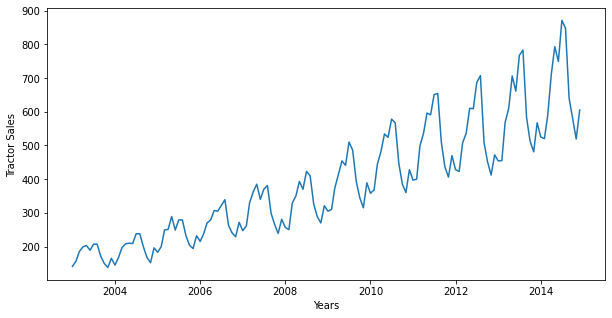

In [ ]:
sales_ts = sales_data['Tractor-Sales']


plt.figure(figsize=(10, 5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

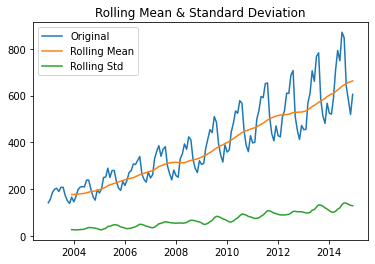

In [ ]:
#Determing rolling statistics
rolmean = sales_ts.rolling(window=12).mean()
rolstd = sales_ts.rolling(window=12).std()



#Plot rolling statistics:
orig = plt.plot(sales_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
from statsmodels.tsa.stattools import  adfuller
s_test = adfuller(sales_data['Tractor-Sales'], autolag='AIC')

In [ ]:
test_output = pd.Series(s_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of obs'])
test_output

Test Statistic      1.108825
p-value             0.995291
#Lags Used         14.000000
Number of obs     129.000000
dtype: float64

In [ ]:
for key, value in s_test[4].items():
    print(f'Critical Value ({key}) is {value}')

Critical Value (1%) is -3.482087964046026
Critical Value (5%) is -2.8842185101614626
Critical Value (10%) is -2.578864381347275
